In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
with open('C:/Users/ducha/.api_keys/census_api.txt') as f:
    api_key = json.load(f)['api_key']

In [4]:
def api_call(url_head, variables, api_key):
    """
    Accepts a url header, variables, and an api_key for the US census API.
    Returns a response with data for the listed variables in a JSON format.
    """
    
    response = requests.get(f"{url_head},{','.join(variables)}&for=state:*&key={api_key}")
    return response

In [5]:
def json_to_pandas(api_response, col_names):
    """
    Accepts a response from a call to the US Census API.
    Returns a cleaned pandas dataframe with statistics on US states.
    """
    
    df = pd.DataFrame(api_response.json()[1:])
    df.drop(df.columns[-1], axis=1, inplace=True) #Drop the state codes
    df.columns = col_names #Give the variables meaningful column names
    df.set_index(keys='state', inplace=True) #Set the US states as an index
    df.drop(index = ['Puerto Rico', 'Hawaii', 'Alaska', 'District of Columbia'], inplace=True) #Drop PR, HI, AL, DC
    df = df.astype(float) #Everything to floats
    
    return df

In [6]:
def region_dfs(df):
    """
    Accepts a dataframe with demigraphic data by state from the US census API.
    Returns dataframes which are subset by the Northern and Southern US.
    """
    south_atlantic_US = ['Delaware', 'Florida', 'Georgia','Maryland',
                         'North Carolina','South Carolina','Virginia',
                         'West Virginia']
    east_south_US = ['Alabama','Kentucky','Mississippi','Tennessee']
    west_south_US = ['Arkansas','Louisiana','Oklahoma','Texas']
    south_US = south_atlantic_US + east_south_US + west_south_US
    
    df_south = df.loc[df.index.isin(south_US)]
    df_north = df.loc[~df.index.isin(south_US)]
    
    return df_south, df_north

In [8]:
url_head = 'https://api.census.gov/data/2018/acs/acs1/profile?get=NAME'

ed_vars = [f'DP02_00{i}PE' for i in range(58,68)]
ed_col_names = ['state', 'total_pop', 'less_than_9_grade','HS_no_diploma','HS_grad','college_no_degree','assoc_degree','bachelor_degree',
             'grad_prof_degree','HS_or_more','bachelor_or_more']


ed_response = api_call(url_head=url_head, variables=ed_vars, api_key=api_key)

In [10]:
df_ed = json_to_pandas(ed_response, ed_col_names)
df_ed_south, df_ed_north = region_dfs(df_ed)

Text(0.5, 0, 'Percentage')

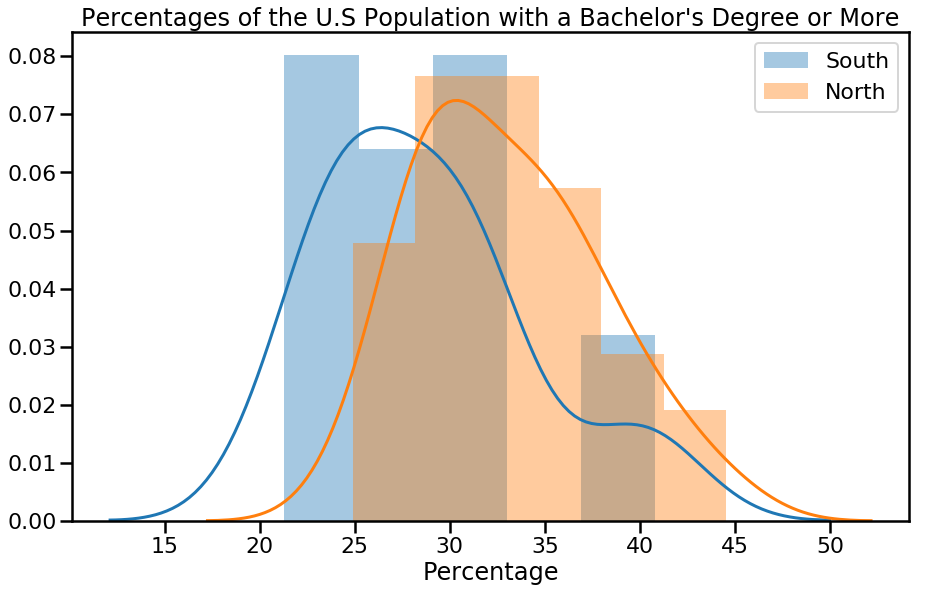

In [11]:
plt.figure(figsize=(15,9))
sns.set_context('poster')
sns.distplot(df_ed_south.bachelor_or_more, label = 'South', bins = 'auto')
sns.distplot(df_ed_north.bachelor_or_more, label = 'North', bins = 'auto')
plt.legend()
plt.title("Percentages of the U.S Population with a Bachelor's Degree or More")
plt.xlabel("Percentage")

In [10]:
df_ed_south.mean()

total_pop           5253249.31
less_than_9_grade         4.51
HS_no_diploma             7.82
HS_grad                  30.16
college_no_degree        20.54
assoc_degree              8.23
bachelor_degree          17.60
grad_prof_degree         11.16
HS_or_more               87.67
bachelor_or_more         28.73
dtype: float64

In [11]:
df_ed_north.mean()

total_pop           4285179.38
less_than_9_grade         3.69
HS_no_diploma             5.62
HS_grad                  27.13
college_no_degree        21.08
assoc_degree              9.47
bachelor_degree          20.54
grad_prof_degree         12.47
HS_or_more               90.70
bachelor_or_more         33.02
dtype: float64

In [12]:
#t-test for north/south education
alpha = 0.05
results = stats.ttest_ind(df_ed_south.bachelor_or_more, df_ed_north.bachelor_or_more,
                equal_var = False)
p_val = results[1]/2

In [50]:
p_val

0.006956484579822223